In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [0]:
df= pd.read_csv('https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv&filename=time_series_2019-ncov-Confirmed.csv')

In [3]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306


In [4]:
df.shape

(487, 65)

In [5]:
df.isnull().sum()

Province/State    162
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
3/18/20             0
3/19/20             0
3/20/20             0
3/21/20             0
3/22/20             0
Length: 65, dtype: int64

In [0]:
date_lis=['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20']
drop_lis=[]
for item in date_lis:
  if df[item].value_counts().max()/df[item].value_counts().sum()> 0.7:
    drop_lis.append(item)


In [0]:
df1=df.drop(drop_lis, axis=1)

In [0]:
df1=df1.drop(['Province/State','Lat','Long'],axis=1)

In [0]:
df2=df1.groupby('Country/Region').sum().reset_index().sort_values('3/22/20',ascending=False)

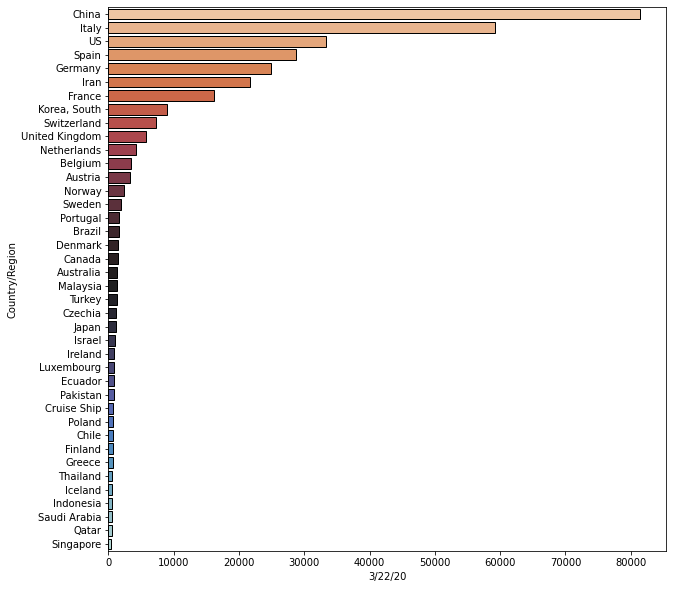

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(x=df2['3/22/20'],y=df2['Country/Region'][:40],edgecolor='black',palette=sns.color_palette('icefire_r',40))

In [0]:
df3=df2.T

In [0]:
df3.columns= df3.iloc[0]
df3=df3.iloc[1:]
df3=df3.reset_index()

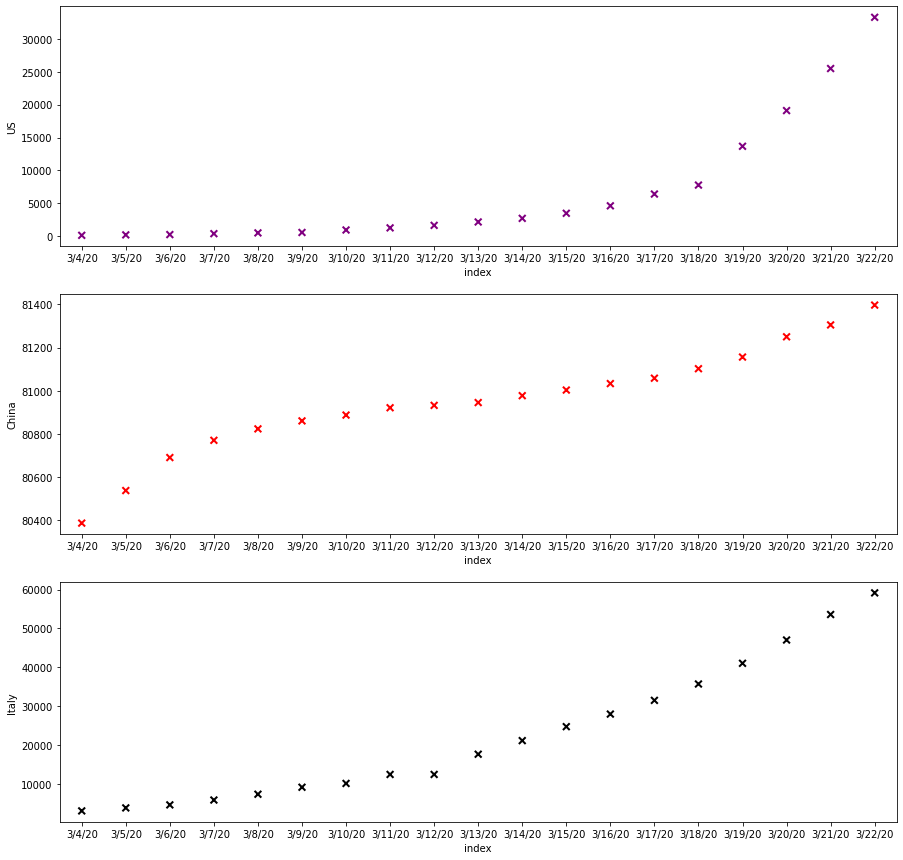

In [13]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.pointplot(y=df3['US'],x=df3['index'],color='Purple',join=False, markers='x')
plt.subplot(3,1,2)
sns.pointplot(y=df3['China'],x=df3['index'],color='Red',join=False, markers='x')
plt.subplot(3,1,3)
sns.pointplot(y=df3['Italy'],x=df3['index'],color='Black',join=False, markers='x')



In [0]:
df2['Country/Region']=df2['Country/Region'].replace({'US':'USA','Korea, South':'South Korea','Taiwan*':'Taiwan','Congo (Kinshasa)':'Congo',"Cote d'Ivoire":'Ivory Coast','Bahamas, The':'Bahamas','Gambia, The':'Gambia','Congo (Brazzaville)':'Congo'})

In [0]:
df2=df2[df2['Country/Region'] != 'Timor-Leste']
df2=df2[df2['Country/Region'] != 'Cruise Ship']
df2=df2[df2['Country/Region'] != 'Kosovo']
df2=df2[df2['Country/Region'] != 'Holy See']
df2=df2[df2['Country/Region'] != 'East Timor']

In [0]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU': 'Europe'
}
countries = df2['Country/Region']
lis= [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries]

In [0]:
df2['Continent']=lis

In [0]:
df4=df2.groupby('Continent').sum().reset_index()

Text(0.5, 1.0, 'Growth of Positive Cases over a span of 5 days')

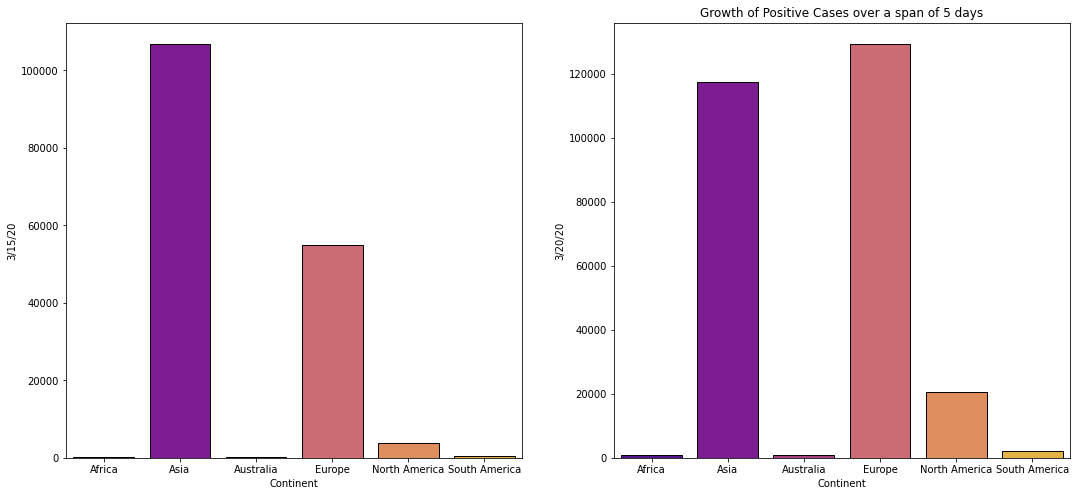

In [19]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.barplot(y=df4['3/15/20'],x=df4['Continent'],edgecolor='black',palette=sns.color_palette('plasma',6))
plt.subplot(1,2,2)
sns.barplot(y=df4['3/20/20'],x=df4['Continent'],edgecolor='black',palette=sns.color_palette('plasma',6))
plt.title('Growth of Positive Cases over a span of 5 days')
